# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# load the data

In [2]:
loan_data=pd.read_csv('Loan Eligibility Predictor.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# check the shape of the data

In [4]:
loan_data.shape

(614, 13)

# check the column names of data set

In [12]:
columns=loan_data.columns
columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# get the data set information

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Stastical measures about data

In [31]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# check the duplicate values

In [33]:
loan_data.duplicated().sum()

0

# check the null values

In [60]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# get the share of values in percentage along with null values

### what is the percentage of male?
### what is the percentage of female?
### what is the percentage of null values?

Male percentage=  79.64
Female percentage=  18.24
Null percentage=  2.12


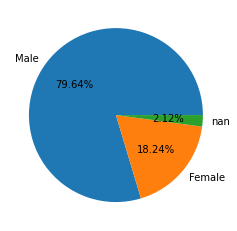

In [258]:
malepct=loan_data.Gender.value_counts()['Male']*100/len(loan_data)
print('Male percentage= ',round(malepct,ndigits=2))

femalepct=loan_data.Gender.value_counts()['Female']*100/len(loan_data)
print('Female percentage= ',round(femalepct,ndigits=2))

nullpct=loan_data.Gender.isna().sum()*100/len(loan_data)
print('Null percentage= ',round(nullpct,ndigits=2))

plt.pie(loan_data.Gender.value_counts(dropna=False),labels=loan_data.Gender.unique(),autopct='%.2f%%')
plt.show()

<AxesSubplot:>

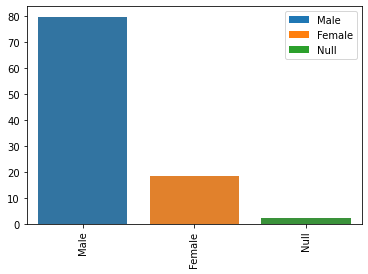

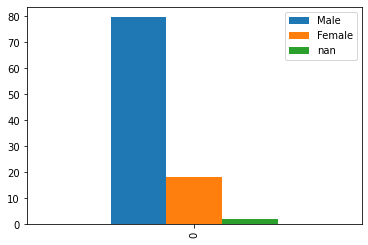

In [294]:


gend=pd.DataFrame([(malepct,femalepct,nullpct)],columns=['Male','Female','Null'])
gend
gend.plot.bar()
sns.barplot(data=gend)
loan_pct=loan_data.Gender.value_counts(dropna=False)*100/len(loan_data)
gend=pd.DataFrame([loan_pct.values],columns=loan_data.Gender.unique())
gend.plot.bar()


In [273]:
loan_pct=loan_data.Gender.value_counts(dropna=False)*100/len(loan_data)
print(loan_pct)

Male      79.641694
Female    18.241042
NaN        2.117264
Name: Gender, dtype: float64


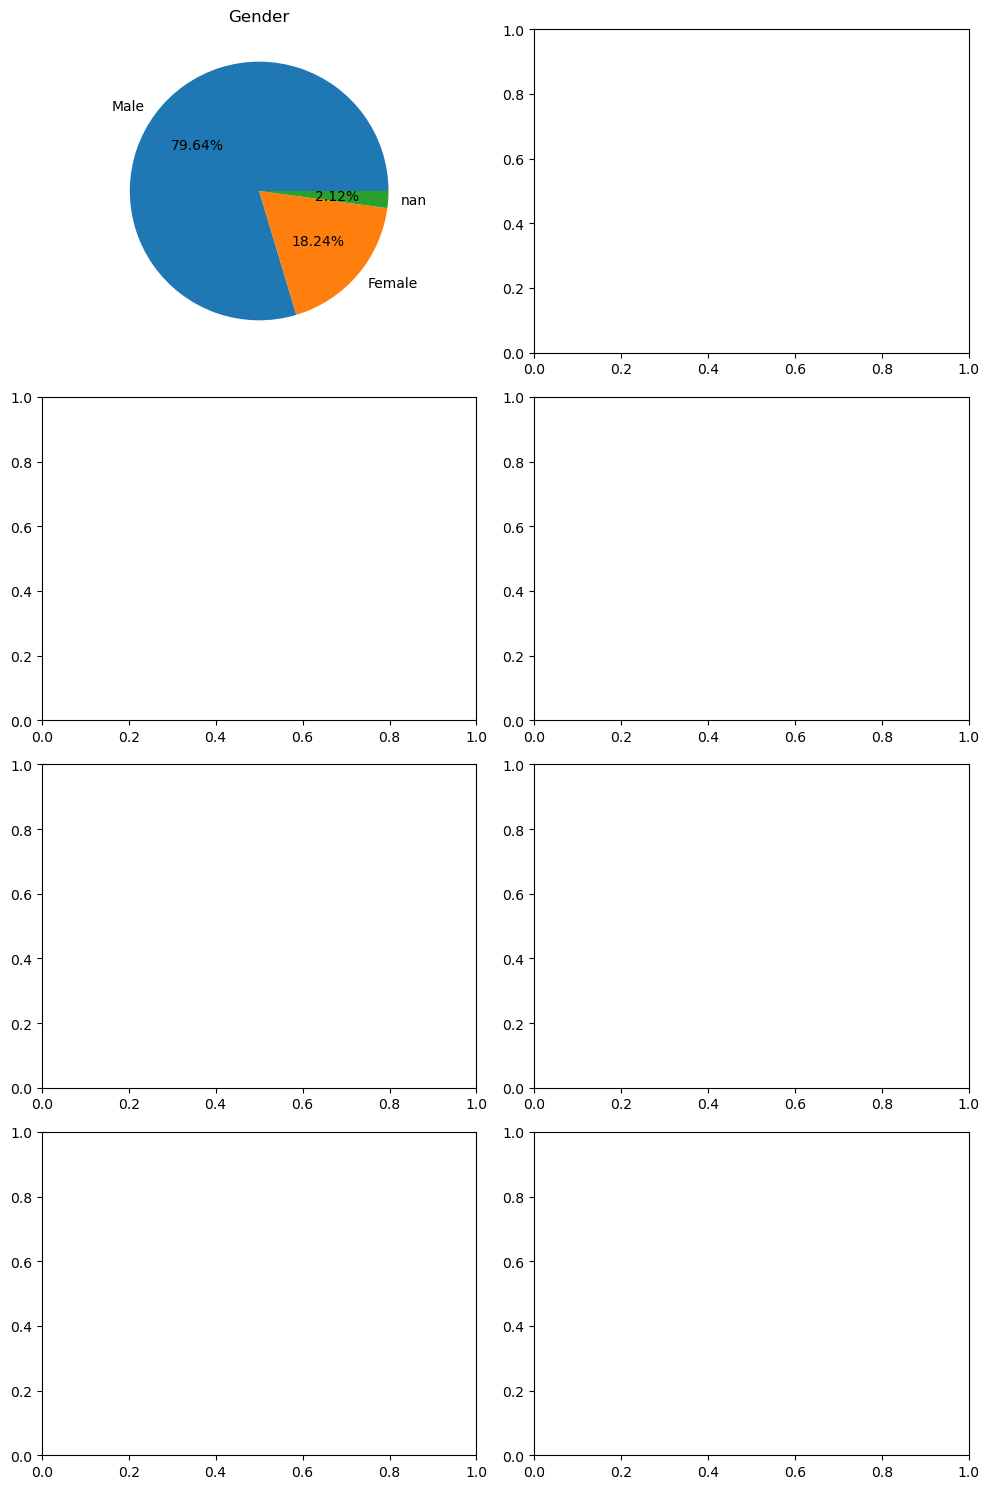

In [324]:
fig,axis=plt.subplots(4,2,figsize=(10,15),dpi=100)
axis[0][0].pie(loan_data.Gender.value_counts(dropna=False),labels=loan_data.Gender.unique(),autopct='%.2f%%')
axis[0][0].set_title('Gender')

plt.tight_layout()
plt.show()


# no of unique elements in each column

In [325]:
loan_data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# split data

- object column,
- numeric column

In [51]:
obj_list=[]
num_list=[]
for i in loan_data.columns:
    if np.dtype(loan_data[i])=='object':
        obj_list.append(i)
    else:
        num_list.append(i)
        
obj_df=loan_data[obj_list]
num_df=loan_data[num_list]

obj_df.head()
num_df.head()      

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [54]:
# another way manually

object_data=pd.concat([loan_data.iloc[:,0:6],loan_data.iloc[:,11:]],axis=1)
object_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [56]:
# functional way

obj_data=loan_data.select_dtypes('object')
obj_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [65]:
num_data=loan_data.select_dtypes(['float64','int64'])
num_data=loan_data.select_dtypes('number')
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


# Univariate analysis

-when we compare a column with other column is called univariate analsysis

### scenario : how many males got the loan

In [81]:
loan_data.Loan_Status.groupby(loan_data.Gender).value_counts()['Male','Y']
gender_pd=loan_data.Loan_Status.groupby(loan_data.Gender).value_counts()

<AxesSubplot:xlabel='Gender', ylabel='count'>

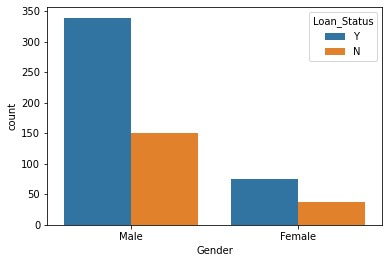

In [111]:
sns.countplot(x='Gender',data=loan_data,hue='Loan_Status')

<AxesSubplot:>

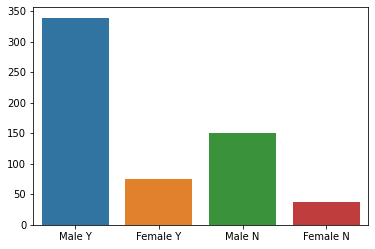

In [98]:
sns.barplot(x=['Female Y','Female N','Male Y','Male N'],y=gender_pd.values ,data=gender_pd,order=['Male Y','Feale Y','Male N','Female N'])

In [110]:
loan_data.Loan_Status.groupby(loan_data.Gender).value_counts()
#loan_data.groupby('Gender').Loan_Status.value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

<AxesSubplot:>

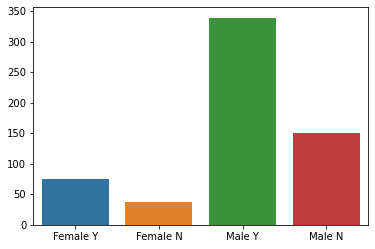

In [106]:
sns.barplot(x=['Female Y','Female N','Male Y','Male N'],y=gender_pd.values ,data=gender_pd)

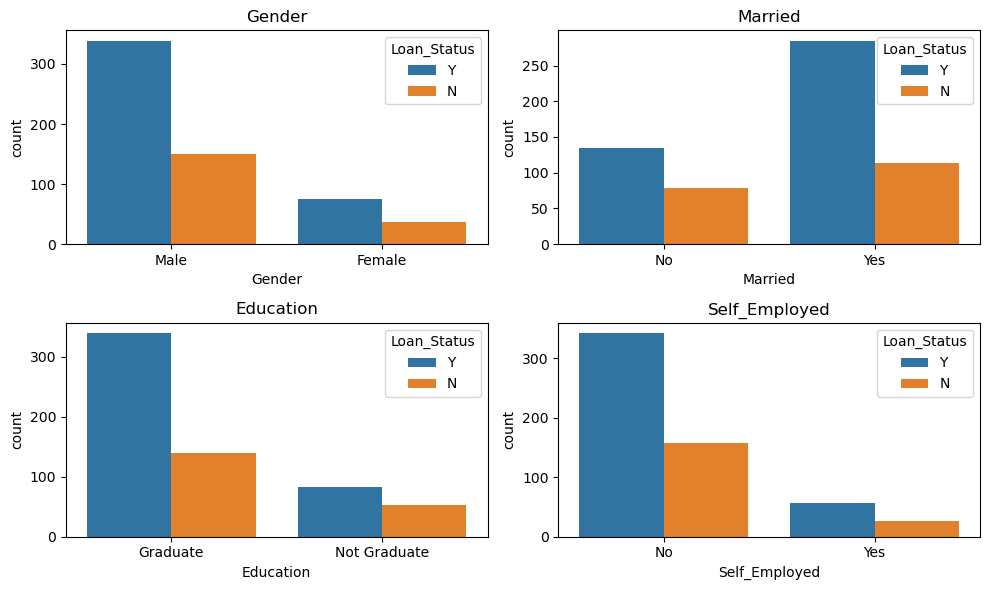

In [125]:
fig,axis=plt.subplots(2,2,figsize=(10,6),dpi=100)
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data,ax=axis[0,0])
axis[0,0].set_title('Gender')

sns.countplot(x='Married',hue='Loan_Status',data=loan_data,ax=axis[0,1])
axis[0,1].set_title('Married')

sns.countplot(x='Education',hue='Loan_Status',data=loan_data,ax=axis[1,0])
axis[1,0].set_title('Education')

sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data,ax=axis[1,1])
axis[1,1].set_title('Self_Employed')

plt.tight_layout()
plt.savefig('Loan estimator.jpg')
fig.savefig('new.jpg')

# treat null values

In [126]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [154]:
loan_data['Gender'].fillna(loan_data.Gender.mode()[0],inplace=True)
loan_data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Apply function

In [4]:
loan_data.apply(lambda x:x)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
loan_data[loan_data.Married.apply(lambda x:x=='Yes')]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


# adding a column with sum of two existing columns

In [8]:
loan_data['Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']

In [10]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


# Sorting values

In [14]:
loan_data.sort_values('Income',ascending=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,81000.0
333,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y,63337.0
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,51763.0
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y,43897.0
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N,42083.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y,1963.0
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N,1950.0
583,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N,1880.0
338,LP002113,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban,N,1830.0


# where function

In [15]:
loan_data['Target']=np.where(loan_data.Loan_Status=='Y',1,0)

In [18]:
y=loan_data[['Target']]
type(y)

pandas.core.frame.DataFrame